<h3>
ΦC<sub>4</sub>H<sub>10</sub> + (6.5)(O<sub>2</sub> + 3.76 N<sub>2</sub>
) → a CO<sub>2</sub>+ b CO + d H<sub>2</sub>O + e H<sub>2</sub>+ f O<sub>2</sub>+g N<sub>2</sub>
</h3>
<hr>
P = 1 atm<br>
T = 298.15 K<br>
Φ=0.9

<h4>Equations:</h4>
Carbon Balance:
a+b=3.6<br>
b=3.6-a

Hydrogen Balance:
2*(d+e)=9<br>
d=4.5-e

Oxygen Balance: 
2(a+f)+b+d=13<br>
2(a+f)+(3.6-a)+(4.5-e)=13<br>
a+2*f-e=4.9<br>
f=2.45- <sup>a</sup>&frasl;<sub>2</sub> + <sup>e</sup>&frasl;<sub>2</sub>

Nitrogen Balance:
g=24.44

<h3>
0.9C<sub>4</sub>H<sub>10</sub> + (6.5)(O<sub>2</sub> + 3.76 N<sub>2</sub>
) → a CO<sub>2</sub>+ (3.6-a) CO + (4.5-e) H<sub>2</sub>O + e H<sub>2</sub>+ (2.45- <sup>a</sup>&frasl;<sub>2</sub> + <sup>e</sup>&frasl;<sub>2</sub>) O<sub>2</sub>+24.44 N<sub>2</sub>
</h3>

total number of moles N<sub>T</sub><br>
= a+(3.6-a)+(4.5-e)+e+(2.45- <sup>a</sup>&frasl;<sub>2</sub> + <sup>e</sup>&frasl;<sub>2</sub>)+24.44<br>

=34.99- <sup>a</sup>&frasl;<sub>2</sub> + <sup>e</sup>&frasl;<sub>2</sub>


Equations:

H<sub>2</sub>O ⇌ H<sub>2</sub> + <sup>1</sup>&frasl;<sub>2</sub> O<sub>2</sub> .............1

CO<sub>2</sub> ⇌ CO + <sup>1</sup>&frasl;<sub>2</sub> O<sub>2</sub>  ............2

In [1]:
from my_package import *

In [2]:
a,b,d,e,f,g=symbols('a b d:g',real=True) #assigning variables to the product's coefficients

#Defining carbon, hydrogen, and Φ values  
x=4 
y=10
phi=0.9

<h4>Mass Balance:</h4>

In [3]:
#Mass balancing equations

#All variables are obtained in terms of either 'a' or 'e'  

#Carbon balance:
c_eqn=Eq(a+b,phi*x)
b=(solve(c_eqn,b)[0])

#Hydrogen balance:
h_eqn=Eq(2*d+2*e,phi*y)
d=(solve(h_eqn,d)[0])

#Oxygen balance:
o_eqn=Eq(2*a+b+d+2*f,(x+y/4)*2)
f=(solve(o_eqn,f)[0])

#Nitrogen balance:
n_eqn=Eq(2*g,(x+y/4)*2*3.76)
g=(solve(n_eqn,g)[0])

N_total=a+b+d+e+f+g

<hr>
H<sub>2</sub>O ⇌ H<sub>2</sub> + <sup>1</sup>&frasl;<sub>2</sub> O<sub>2</sub> .............1

In [4]:
kp1=e*f**0.5/(d) * (1/(N_total))**(0.5) 
kp1

1.56524758424985*e*(-0.204081632653061*a + 0.204081632653061*e + 1)**0.5*(1/(-0.5*a + 0.5*e + 34.99))**0.5/(4.5 - e)

<br>
CO<sub>2</sub> ⇌ CO + <sup>1</sup>&frasl;<sub>2</sub> O<sub>2</sub>  ............2

In [5]:
kp2=b*f**0.5/(a)*(1/N_total)**(1+0.5-1)
kp2

1.56524758424985*(3.6 - a)*(-0.204081632653061*a + 0.204081632653061*e + 1)**0.5*(1/(-0.5*a + 0.5*e + 34.99))**0.5/a

<hr>

In [6]:
#Variables to hold values for each iteration

temps={} #holds each temperature with its corresponding Q

composition_values={a:['a'] , b:['b'] , d:['d'] , e:['e'] , f:['f'] , g:['g'] } #holds composition values 

In [7]:
#Assume starting Temperature=1800 K
t=1800


#Getting properties and equations at t

if t in data.index:   #making sure t doesn't need interpolation
    props=data.loc[t]

else:
    props=interpolate(t,data)
    
    
eq1=Eq(kp1,exp(props['Kp1']))
eq2=Eq(kp2,exp(props['Kp2']))

In [8]:
e2=solve(eq2,e)[0] #solving for e in equation 2

eqn=eq1.subs({e:e2}) #substituting in equation 1

a1=solve(eqn)
for i in a1:
    if i >0 and i <3.6: #since equation has multiple roots, conditions for a are added to decide value to be taken
        a1=i
        
e1=e2.subs(a,a1)  #obtaining e by substituting value of a 

In [9]:
#obtaining the rest of the values:

for i in composition_values.keys(): 
    composition_values[i].append(i.subs({a:a1,e:e1}))

<hr>
<h3>Q = H<sub>P</sub> - H<sub>R</sub> = 0

In [10]:
#defining hf of the fuel 
h_f_C4H10=-126150

<b>Calculating H<sub>R</sub>:</b>

In [11]:
H_R=phi*(h_f_C4H10) + 6.5*(data.loc['h_f']['O2']+data.loc[298]['O2']) + g*(data.loc['h_f']['N2']+data.loc[298]['N2'])

<b>Calculating H<sub>P</sub>:</b>

In [12]:
H_P=a*(data.loc['h_f']['CO2']+props['CO2']) + b*(data.loc['h_f']['CO']+props['CO']) +d*(data.loc['h_f']['H2O']+props['H2O']) +e*(data.loc['h_f']['H2']+props['H2']) + f*(data.loc['h_f']['O2']+props['O2']) + g*(data.loc['h_f']['N2']+props['N2'])

In [13]:
Q=H_P.subs({a:a1,e:e1}) - H_R 

temps[t]=Q #adding Q to its corresponding temperature

In [14]:
#depending on either Q is positive or negative to increase or decrease the temperature
q_pos=None
q_neg=None

if Q>0: #decrease Temperature
    t-=100
    q_pos=Q
else: #higher Temperature
    t+=50
    q_neg=Q

<h3>Using the newly obtained temperature, repeat the previous steps until Q is almost 0</h3>

In [15]:
while abs(Q)>0.1 :          
    
    #Getting properties at t
    
    if t in data.index:                #making sure t doesn't need interpolation
        props=data.loc[t]

    else:
        props=interpolate(t,data)

    
    
    eq1=Eq(kp1,exp(props['Kp1']))
    eq2=Eq(kp2,exp(props['Kp2']))    

    e2=solve(eq2,e)[0]
    eqn=eq1.subs({e:e2})
    a1=solve(eqn)
    
    for i in a1:
        if i >0 and i <3.6:
            a1=i
    e1=e2.subs(a,a1)  
    
    
    for i in composition_values.keys():
        composition_values[i].append(i.subs({a:a1,e:e1}))
    
    
    #Calculating new Q
    
    H_P=a*(data.loc['h_f']['CO2']+props['CO2']) + b*(data.loc['h_f']['CO']+props['CO']) +d*(data.loc['h_f']['H2O']+props['H2O']) +e*(data.loc['h_f']['H2']+props['H2']) + f*(data.loc['h_f']['O2']+props['O2']) + g*(data.loc['h_f']['N2']+props['N2'])
    
    Q=H_P.subs({a:a1,e:e1}) - H_R 
    
    temps[t]=Q
    
    
    while not q_pos:
        if Q>0:
            q_pos=Q    #since q_neg is already obtained at the first iteration then once q_pos is obtained we could interpolate
            
        else:
            q_neg=Q
            t+=50
            break
      
    
    #in case both positive and negative values of Q are obtained then the a.f.t lies between those temperatures         
    if q_neg and q_pos: 
        if Q>0 and Q<q_pos: 
            q_pos=Q
        elif Q<0 and Q>q_neg: 
            q_neg=Q
        t=(get_key(q_neg,temps))+(-q_neg)*(get_key(q_pos,temps)-get_key(q_neg,temps))/(q_pos-q_neg)

    

<h3>Formating the results</h3>

In [93]:
headings=['CO2','CO','H2O','H2','O2','N2','Q']

content=[i[1:] for i in composition_values.values()]
content.append(list(temps.values()))
content=np.round(np.array(content,dtype='float64').T,5)


ind=np.round(np.array(list(temps.keys()),dtype='float64'),4)

In [94]:
df=pd.DataFrame(content,columns=headings)
df['Temperature']=ind
df.set_index('Temperature',inplace=True)
df

,CO2,CO,H2O,H2,O2,N2,Q
Temperature,,,,,,,
1800.0000,3.59477,0.00523,4.49827,0.00173,0.65348,24.44,-590983.94020
1850.0000,3.59169,0.00831,4.49737,0.00263,0.65547,24.44,-522791.49911
1900.0000,3.58681,0.01319,4.49600,0.00400,0.65859,24.44,-453983.54853
1950.0000,3.57912,0.02088,4.49394,0.00606,0.66347,24.44,-384218.05101
2000.0000,3.56704,0.03296,4.49083,0.00917,0.67107,24.44,-312974.33343
2050.0000,3.55237,0.04763,4.48716,0.01284,0.68023,24.44,-248320.01850
2100.0000,3.53149,0.06851,4.48207,0.01793,0.69322,24.44,-181585.22896
2150.0000,3.50203,0.09797,4.47506,0.02494,0.71145,24.44,-107041.92454
2200.0000,3.46100,0.13900,4.46549,0.03451,0.73676,24.44,-28653.93418


In [145]:
print(f'adiabatic flame temperature= {ind[-1]}')
for i in df.columns:
    print(f'{i}= {df[i].iloc[-1]:.4f}')
    

adiabatic flame temperature= 2218.2166
CO2= 3.4457
CO= 0.1543
H2O= 4.4619
H2= 0.0381
O2= 0.7462
N2= 24.4400
Q= -0.0017


<h3>Plotting Graphs</h3>

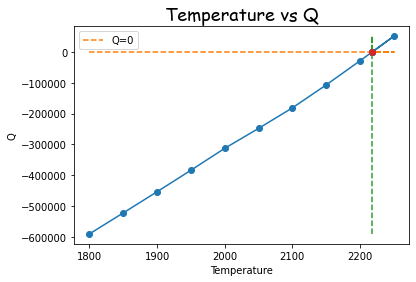

In [234]:
plt.plot(df['Q'],'o-')

x1=ind.tolist()
y1=[0 for i in range(len(ind))]
plt.plot(x1,y1,label='Q=0',linestyle='--')

x2=[ind[-1] for i in range(len(ind))]
y2=df['Q']
plt.plot(x2,y2,'--')

x3=ind[-1]
y3=df['Q'].iloc[-1]
plt.plot(x3,y3,'o')

plt.title("Temperature vs Q", fontdict={'fontname': 'Comic Sans MS', 'fontsize': 18})
plt.xlabel('Temperature')
plt.ylabel('Q')
plt.legend()

#plt.savefig("random.jpg")

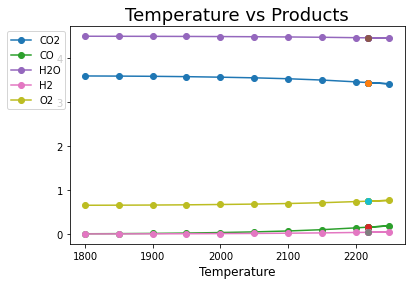

In [279]:
#plotting all products (except N2) on the same graph
for i in df.columns[:-2]:
    
    plt.plot(df[i],'o-',label=i)
    
    x3=ind[-1]
    y3=df[i].iloc[-1]
    plt.plot(x3,y3,'o')
    
    #plt.xticks([ind[-1]])
    #plt.yticks([df[i].iloc[-1]])
    
    plt.title(f'Temperature vs Products',fontdict={'fontsize': 18})
    plt.xlabel('Temperature',fontdict={'fontsize': 12})

    plt.legend(bbox_to_anchor= (0,1))
    
#plt.savefig("Products.jpg",dpi = 350)    #to save the graphs as images

    
    

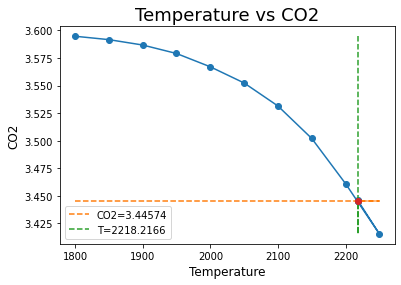

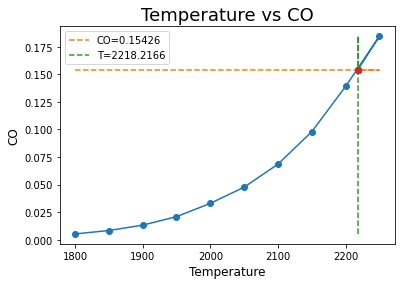

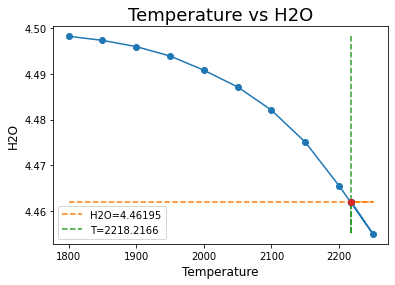

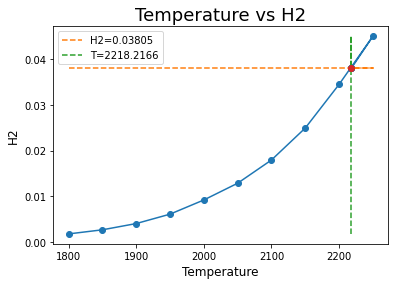

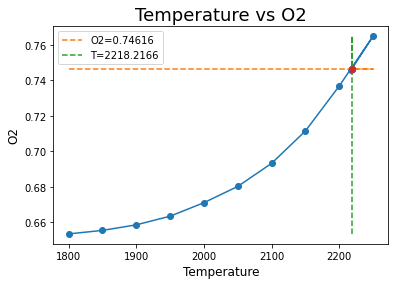

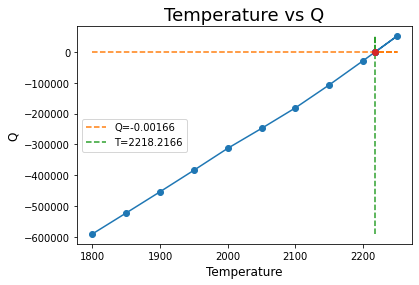

In [34]:
#plotting each products (except N2) on a separate graph
for i in df.columns:
    if i=='N2':
        continue
    
    plt.plot(df[i],'o-')
    
    x1=ind.tolist()
    y1=[df[i].iloc[-1] for j in range(len(ind))]
    plt.plot(x1,y1,label=f'{i}={df[i].iloc[-1]:.5f}',linestyle='--')

    x2=[ind[-1] for i in range(len(ind))]
    y2=df[i]
    plt.plot(x2,y2,'--',label=f'T={ind[-1]}')

    x3=ind[-1]
    y3=df[i].iloc[-1]
    plt.plot(x3,y3,'o')
    
    #plt.xticks([ind[-1]])
    #plt.yticks([df[i].iloc[-1]])
    
    plt.title(f'Temperature vs {i}',fontdict={'fontsize': 18})
    plt.xlabel('Temperature',fontdict={'fontsize': 12})
    plt.ylabel(i,fontdict={'fontsize': 12})
    
    plt.legend()
    
    #plt.savefig(f"{i}.jpg",dpi = 200)    #to save the graphs as images
    plt.show()

    
    